In [16]:
# encoding: utf-8
import wave
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# File open
fname = '/Users/jin237/Documents/juxtaphony_project/new_iinodemo/Audio/throat_iinodemo_03.wav'
wfile = wave.open(fname, 'r')

In [18]:
# Get channels, sample width, sampling rate, the number of sample
numch = wfile.getnchannels()
samplewidth = wfile.getsampwidth()
samplerate = wfile.getframerate()
numsamples = wfile.getnframes()

In [19]:
# Print each value
print("チャンネル数 = ", numch)
print("サンプル幅 (バイト数) = ", samplewidth)
print("サンプリングレート (Hz) =", samplerate)
print("サンプル数 =", numsamples)
print("録音時間 =", numsamples / samplerate)

チャンネル数 =  1
サンプル幅 (バイト数) =  2
サンプリングレート (Hz) = 44100
サンプル数 = 757694
録音時間 = 17.18126984126984


In [20]:
# Read all frame
buf = wfile.readframes(numsamples)
wfile.close()

In [21]:
# Change to ndarray of numpy
data = np.frombuffer(buf, dtype='int16')
data = data/32768.0
data = data[0::2]

In [22]:
# output sampling rate from No.62000
# Do the DFT:Discrete Fourier Transform
start = 62000
N = samplerate
c = np.fft.fft(data[start:start+N])
c = abs(c)

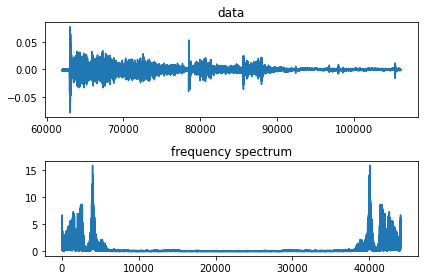

In [23]:
# Graph Plot
plt.subplot(2,1,1)
plt.title('data')
plt.plot(range(start, start+N), data[start:start+N])
plt.savefig('conde_iinodemo.png')
plt.subplot(2,1,2)
plt.title('frequency spectrum')
plt.plot(c, linestyle='-')
plt.tight_layout()
plt.savefig('conde_iinodemo.png')